In [1]:
import keras

2025-11-28 11:36:53.013336: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-28 11:36:53.069246: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-28 11:36:55.048041: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [4]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0    # --> train input을 keras의 conv2D층이 요구하는 4차원 tensor 형태로 변환 (-1: 배치 크기 자동 설정, 높, 너, 채(깊)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [5]:
#keras.layers.Conv2D(10, kernel_size =(3, 3), activation = 'relu')
#케라스를 사용하여 2차원 컨볼루션 레이어 정의  -> 주로 이미지 처리와 같은 CNN 모델에서 특징을 추출하는데 사용됨
# 10: 필터 또는 커널의 계수, 컨볼루션 위도우(커널) 크기, 3*3의 창이 입력 이미지 위를 슬라이딩하며 연산 수행, relu: 컨볼루션 연산 결과에 적용되는 활성화함수 

#relu: 음수를 0으로 만들고 양수는 그래도 유지하여 모델에 비선형성 추가
#이동의 크기는? 스트라이드(기본 1)
#풀링: 합성곱층에서 만든 특성 맵의 가로세로 크기 줄이는 역할, 차원 개수(특성맵의 개수)는 줄이지 않고 크기만 줄임, 커널 없는 필터를 적용하는 것과 비슷
#풀링층은 합성곱층 바로 다음에 위치, 데이터 크기를 줄이고 압축하는 역할, 과적합을 예방함 > 가중치가 없음, 영역 내 가장 큰 값 혹은 평균을 선택, 겹치지 않고 이동함
#합성곱층 및 풀링층 출력은 특성맵이라고 부름

In [6]:
#keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 1)

In [7]:
#keras.layers.MaxPooling2D(2)
#keras.layers.MaxPooling2D(2, strides = 2, padding = 'vaild')
#padding = 'valild'(유효한 영역만 사용한다 라는 의미) or 'same' 적용 가능

In [8]:
#설정 사항을 모델에 적용하려면?
#model = keras. ~
#model.add(keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 1))
#이런식으로 적용

In [9]:
#흑백 이미지는 2차원, 컬러 이미지는 여러차원(RGB)
#keras의 합성곱은? 항상 3차원 이미지를 기대함. 따라서 흑백 이미지인 2차원 데이터를 전송하려면 사용자가 3차원으로 변환해서 입력해줘야함

In [10]:
 #왜 3차원이 아니고 4차원 데이터를 입력하는가?
 #3차원: 높이(이미지의 세로 픽셀 수), 너비(이미지의 가로 픽셀 수), 채널(색상 정보의 싶이 흑백1, 컬러3)
 #4차원: 딥러닝 모델은 개별 이미지를 한 장씩 처리하지 않고 여러장을 묶어서(batch) 한 번에 처리, 따라서 배치 크기도 한 차원으로 추가하여 입력해줘야함

In [11]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same')) #3*3 필터 32개
model.add(keras.layers.MaxPooling2D(2)) #2차원 데이터에 최대 풀링 수행, 풀링 윈도우 2*2크기 
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())     #평탄화층(차원변환)
model.add(keras.layers.Dense(100, activation = 'relu'))   #밀집층(분류 및 학습)
model.add(keras.layers.Dropout(0,4))   #드롭아웃층(과적합 방지)
model.add(keras.layers.Dense(10, activation = 'softmax')) #밀집층


W0000 00:00:1764297419.645456   44039 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

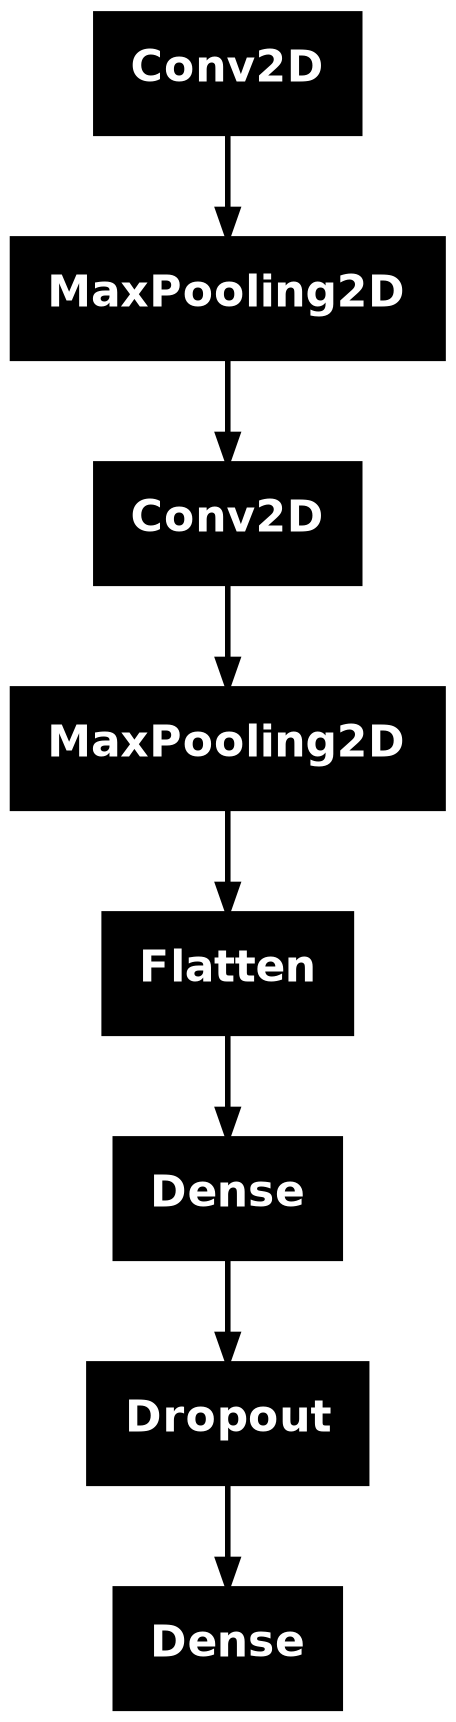

In [13]:
keras.utils.plot_model(model)

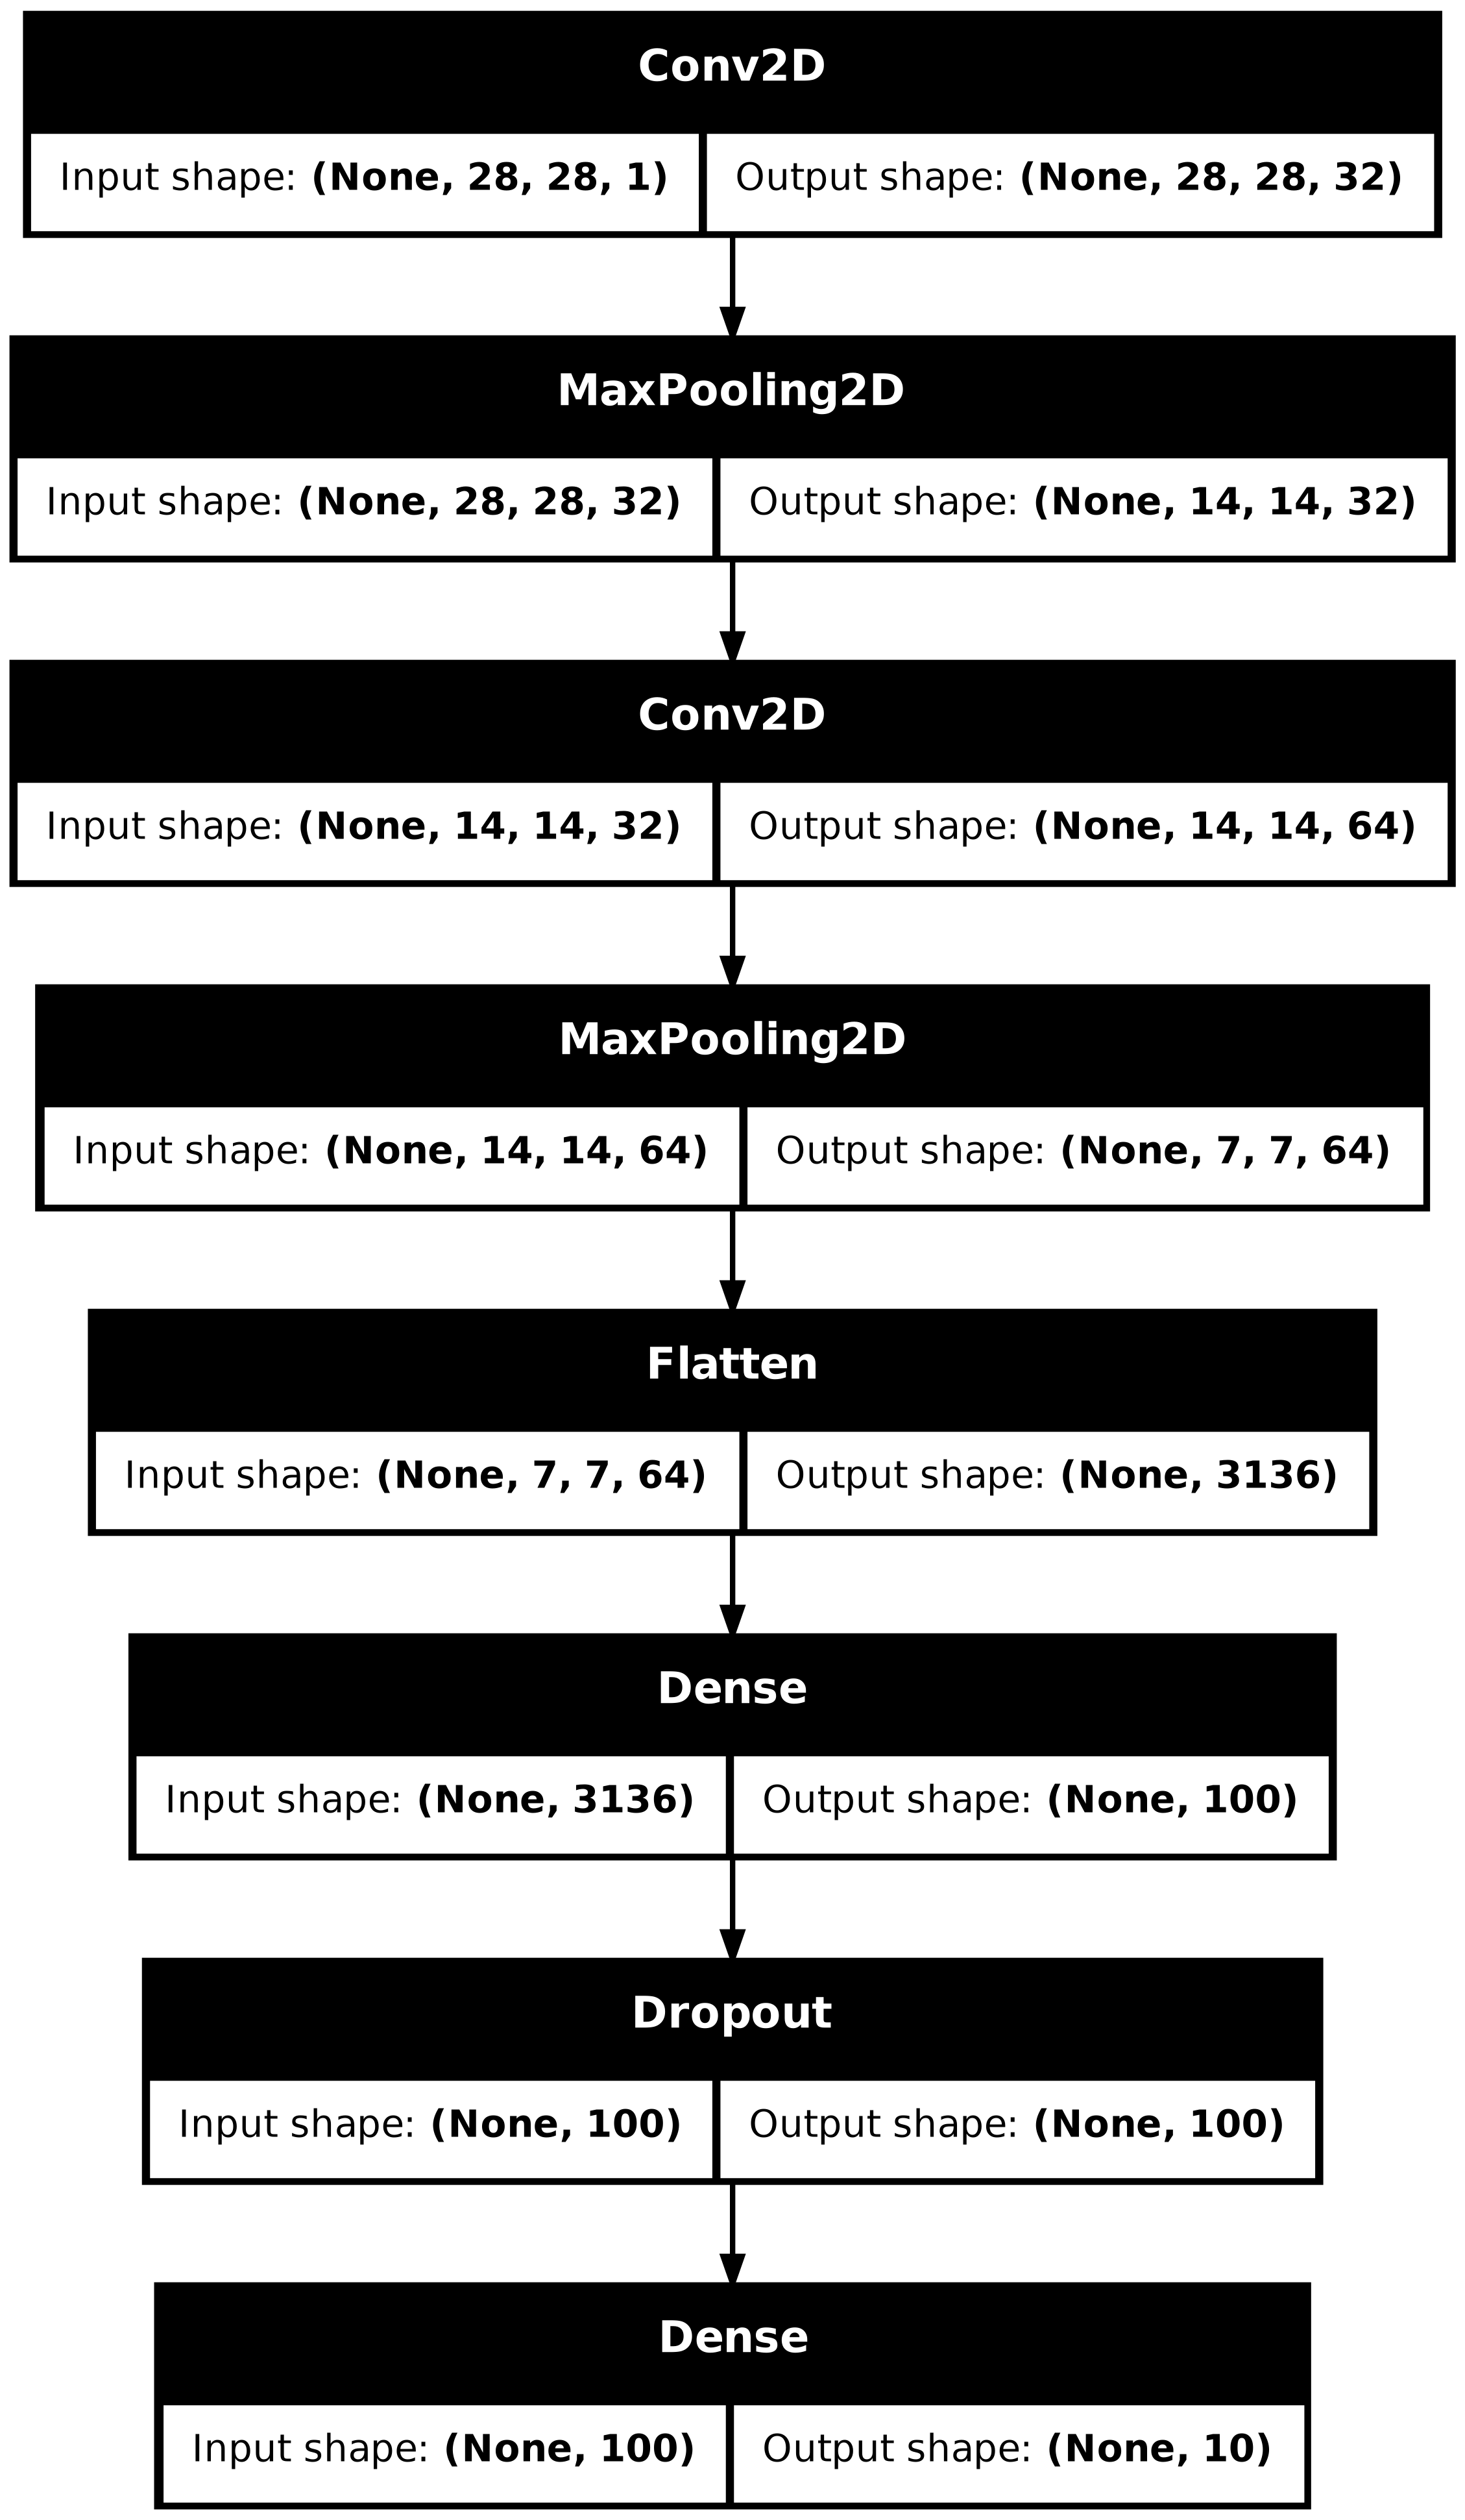

In [15]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn-architecture.png', dpi =300)

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#모델 훈련 전에 파라미터 세팅

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only = True)
#Keras 모델을 훈련하는 동안 최고의 성능을 보인 시점의 모델 가중치를 자동으로 저장하도록 설정

In [18]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), 
                    callbacks = [checkpoint_cb, early_stopping_cb])
#모델 훈련

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8460 - loss: 0.4262 - val_accuracy: 0.8833 - val_loss: 0.3226
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9005 - loss: 0.2780 - val_accuracy: 0.8987 - val_loss: 0.2735
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9155 - loss: 0.2309 - val_accuracy: 0.9061 - val_loss: 0.2528
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9265 - loss: 0.1992 - val_accuracy: 0.9113 - val_loss: 0.2400
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9359 - loss: 0.1728 - val_accuracy: 0.9187 - val_loss: 0.2314
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9456 - loss: 0.1470 - val_accuracy: 0.9183 - val_loss: 0.2299
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9537 - loss: 0.1240 - val_accuracy: 0.9211 - val_loss: 0.2378
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9612 - 

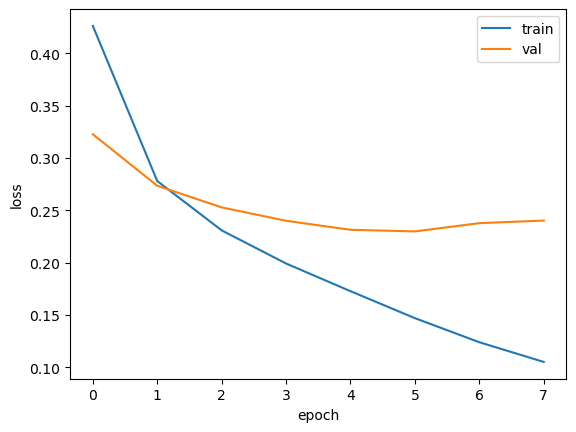

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
#모델 훈련 후에 얻은 history 객체를 사용하여, 훈련 과정 동안의 손실(Loss) 변화를 시각화

In [21]:
model.evaluate(val_scaled, val_target)  #결과: 손실과 ,정확도

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - loss: 0.2299


[0.22987158596515656, 0.9183333516120911]

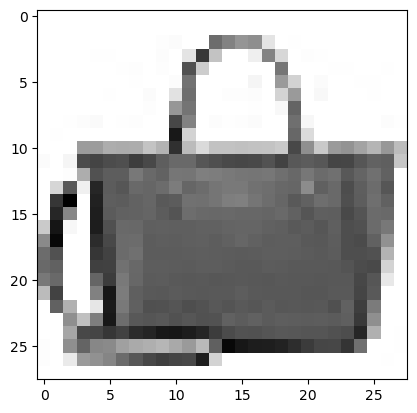

In [22]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [23]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[7.4437687e-12 2.5177318e-16 1.8768743e-12 4.4190506e-13 1.5106402e-10
  1.8965345e-11 1.5496727e-11 4.1736514e-11 1.0000000e+00 8.8270800e-11]]


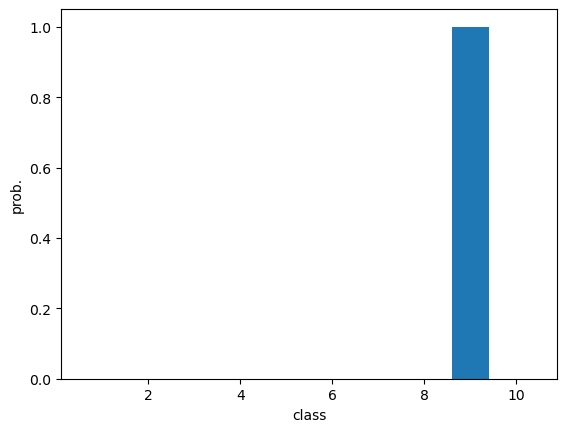

In [24]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [25]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [26]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [28]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9107 - loss: 0.2506


[0.2506139278411865, 0.9107000231742859]